## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## Imports

In [1]:
from image_processing import *
from lanes_and_curvatures import *
from calibration import *
from pipeline import  LanesDetector

import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip
%matplotlib inline

## 1. Compute the camera calibration using chessboard images

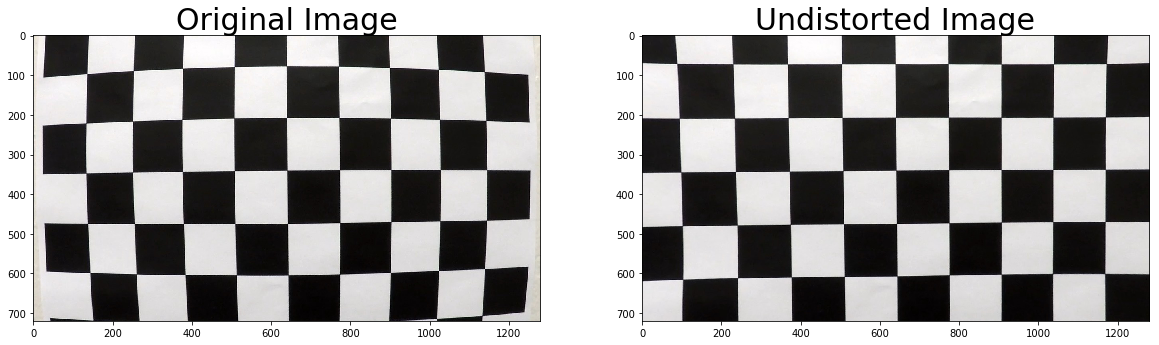

In [2]:
camera = Camera()

camera.calibrate("./camera_cal/*.jpg")

# Read test image
image = im.imread("camera_cal/calibration1.jpg")
dst   = camera.undistort(image)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

## 1. Apply a distortion correction to raw images.

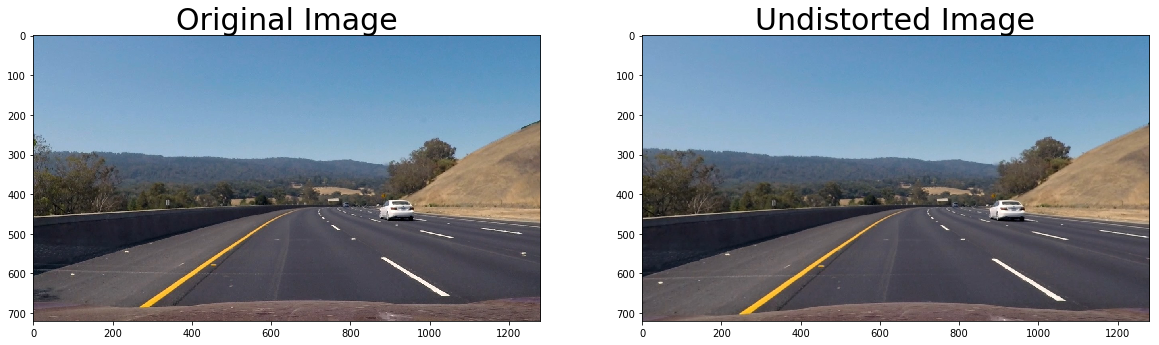

In [3]:
image             = plt.imread("test_images/test3.jpg")
undistorted_image = camera.undistort(image)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undistorted_image)
ax2.set_title('Undistorted Image', fontsize=30)

## 3. Use color transform to create a thresholded binary image.

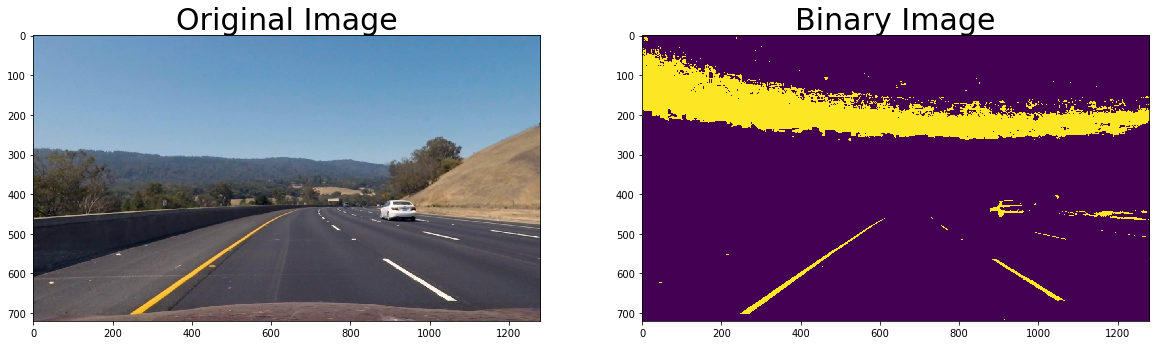

In [4]:
binary = binary_mask(undistorted_image)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(undistorted_image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(binary)
ax2.set_title('Binary Image', fontsize=30)

## 4. Apply a perspective transform to rectify binary image ("birds-eye view").

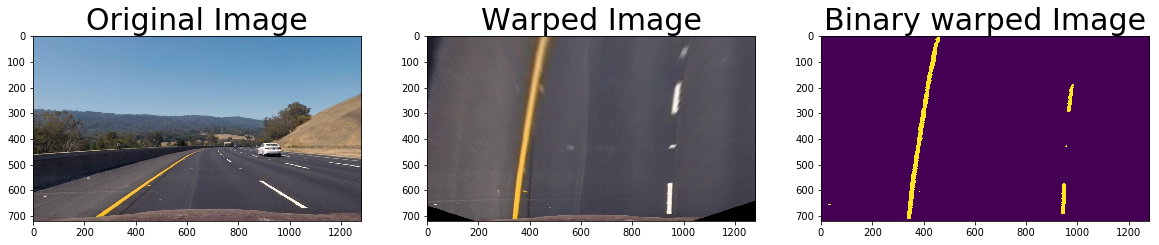

In [5]:
src        = np.float32([[(200, 720), (570, 465), (730, 465), (1200, 720)]]) 
dst        = np.float32([[(320, 720), (320, 0), (980, 0), (980, 720)]])
M, Minv    = get_perspective_transform(image, src, dst)

warped        = warp(undistorted_image, M)
binary_warped = warp(binary, M)

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.imshow(undistorted_image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(warped)
ax2.set_title('Warped Image', fontsize=30)
ax3.imshow(binary_warped)
ax3.set_title('Binary warped Image', fontsize=30)

### 5. Detect lane pixels and fit to find the lane boundary

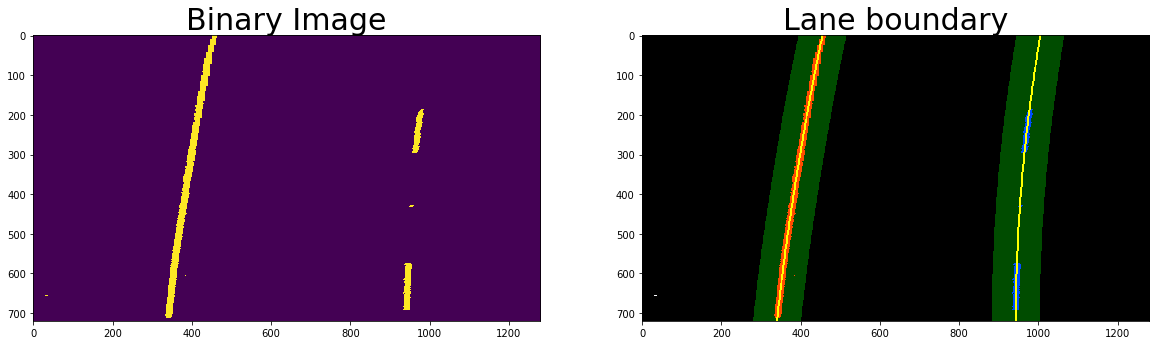

In [6]:
left_fit, right_fit, leftx, lefty, rightx, righty = find_lines(binary_warped)
lane_boundary = draw_fit(binary_warped, leftx, lefty, rightx, righty, left_fit, right_fit, margin=60)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(binary_warped)
ax1.set_title('Binary Image', fontsize=30)
ax2.imshow(lane_boundary)
ax2.set_title('Lane boundary', fontsize=30)

## 6. Determine the curvature of the lane and vehicle position with respect to center.

In [7]:
y                   = np.linspace(0, image.shape[0]-1, image.shape[0])
curvature, distance = compute_curvature_and_distance(undistorted_image, y, left_fit, right_fit)

curvature_text = "Radius of curvature : {0:0.2f}m ".format(curvature) 
distance_text  = "Vehicle is {0:0.3f}m {1} of the center".format(abs(distance),
                                                                "Right" if distance > 0 else "Left")

print(curvature_text)
print(distance_text)
    

Radius of curvature : 859.47m 
Vehicle is 0.005m Left of the center


## 7. Warp the detected lane boundaries back onto the original image.

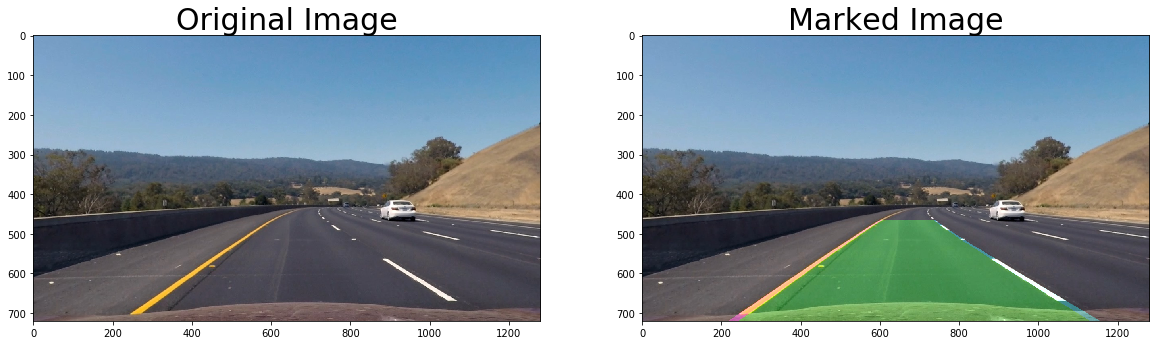

In [8]:
marked_image = mark_lane(undistorted_image, binary_warped, left_fit, right_fit,  Minv)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
plt.imshow(undistorted_image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(marked_image)
ax2.set_title('Marked Image', fontsize=30)

## 8. Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

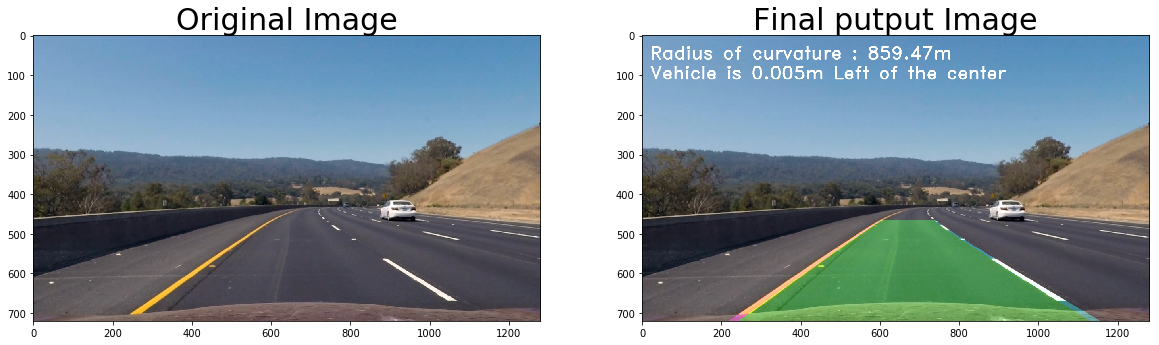

In [9]:
output = draw_curvatures_and_distance(marked_image, left_fit, right_fit)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(undistorted_image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(marked_image)
ax2.set_title('Final putput Image', fontsize=30)

## Execute Pipeline

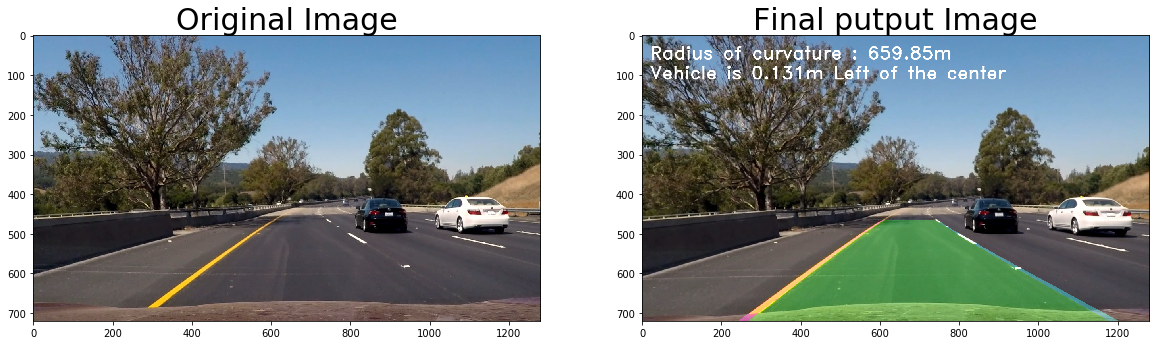

In [10]:
image    = plt.imread("./test_images/test6.jpg")
detector = LanesDetector(camera)
output   = detector.mark_lane(image)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(output)
ax2.set_title('Final putput Image', fontsize=30)

## Process video

In [11]:
detector = LanesDetector(camera)
video_output1 = 'project_video_output.mp4'
video_input1 = VideoFileClip('project_video.mp4')
processed_video = video_input1.fl_image(lambda image: detector.mark_lane(image))
processed_video.write_videofile(video_output1, audio=False)

[MoviePy] >>>> Building video project_video_output_all.mp4
[MoviePy] Writing video project_video_output_all.mp4


100%|█████████▉| 1260/1261 [03:16<00:00,  6.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output_all.mp4 




[![ADVANCE LANE DETECTION](https://img.youtube.com/vi/sp2L505b6f0/0.jpg)](https://youtu.be/sp2L505b6f0 "Advance Lane Detection")